<!-- # CNN autoencoder and Clustering from MTRX data

Use this notebook to load Scienta Omicron Matrix format SPM data and create standardised images for machine learning training and analysis. The code can generate both JPG image data, useful for manually checking the data, and windowed numpy data that can be loaded into ML models. 

The notebook then creates an autoencoder for training on a large dataset, followed by KMEANS clustering. 

**Author**: Steven R. Schofield  
**Created**: November, 2024 -->

# CASTEP - Si lattice parameter optimisations
## Steven R. Schofield (Universtiy College London) May 2025

### Load required modules

In [4]:
import sys
from pathlib import Path

# Define candidate paths using Path objects
module_path_list = [
    Path('/Users/steven/academic-iCloud/Python/modules'),
    Path('/hpc/srs/Python/modules')
]

data_path_list = [
    Path('/Users/steven/academic-iCloud/Calculations/castep/'),
    Path('/hpc/srs/castep')
]

# Resolve actual paths
module_path = next((p for p in module_path_list if p.exists()), None)
data_path = next((p for p in data_path_list if p.exists()), None)

# Check and report missing paths
if module_path is None:
    print("Error: Could not locate a valid module path.")
if data_path is None:
    print("Error: Could not locate a valid data path.")

if module_path is None or data_path is None:
    sys.exit(1)

# Add module_path to sys.path if needed
if str(module_path) not in sys.path:
    sys.path.insert(0, str(module_path))

# Print resolved paths
print(f"module_path = {module_path}")
print(f"data_path = {data_path}")

module_path = /hpc/srs/Python/modules
data_path = /hpc/srs/castep


In [5]:
# # Ensure modules are reloaded 
%load_ext autoreload
%autoreload 2

# Import standard modules
import numpy as np
import pandas as pd
import os

# Import custom module
import SRSCALCUTILS.castep_tools as ct

from IPython.display import display, Image as StaticImage

ModuleNotFoundError: No module named 'ase'

### Job paths

In [3]:
# Parameters for windows creation
# General
job_folder = 'work-2025/si_lattice_001'
job_path = data_path / job_folder
verbose = False             # Set this True to print out more information

# Print resolved paths
print(f"job_path = {job_path}")

job_path = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001


### Create CASTEP input files

In [4]:
params = {'task' : 'geomopt',
          'xc_functional'           : 'PBE',
#          'basis_precision'         : 'precise',         #coarse | medium | fine | precise OR 'cut_off_energy' : 750,
          'cut_off_energy'          : 700,
          'spin_polarised'          : 'false',
          'write_cell_structure'    : 'true',
          'charge'                  : 0,
          'nextra_bands'            : 6,
          'geom_energy_tol'         : 0.00005,          # default: 0.00005 eV 
          'geom_disp_tol'           : 0.002,            # default: 0.002 Ang.
          'geom_max_iter'           : 100,              # default: 30
          'geom_convergence_win'    : 2,                # default: 2
          'max_scf_cycles'          : 300               # default: 30
          }              

In [5]:
# 

filename = "silicon"
title = "silicon lattice parameter optimisation"

na=1
nb=1
nc=1

lattice_cart = np.array([
            [3.8,     0.0,     0.0],
            [0.0,     3.8,     0.0],
            [0.0,     0.0,     5.4,]
        ])

positions_frac = np.array([
            ['Si', 0.0,  0.0,  0.0],
            ['Si', 0.5,  0.0,  0.25],
            ['Si', 0.5,  0.5,  0.5],
            ['Si', 0.0,  0.5,  0.75],
        ])

constraints = np.array([
            [1,  1,  2],
            [0,  0,  0]
        ])

kpoints_mp_grid = np.array([8, 8, 8])

fix_all_ions = True
symmetry_generate=False
symmetry_tol = 0.01

In [6]:
# If it doesn’t exist, create it (including any missing parent folders)
if not os.path.isdir(job_path):
    os.makedirs(job_path, exist_ok=True)

# Now safely switch into it
os.chdir(job_path)

print("Now in:", os.getcwd())
print("Files:", os.listdir())

Now in: /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/academic/Calculations/castep/work-2025/si_lattice_001
Files: []


### Convergence with cut off energy

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-200.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-200.cell

To err is human,
To purr feline.
		-- Robert Byrne


                                         FILE: silicon-200.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-200.castep   

No warnings found in: silicon-200.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-200.castep


,Parameter,Value
0,plane wave basis set cut-off,200.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


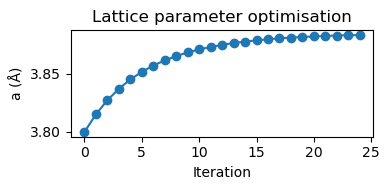

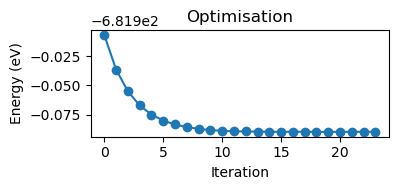

Final unit cell
	 [3.8833923, -0.0, -0.0]
	 [-0.0, 3.8833923, -0.0]
	 [-0.0, -0.0, 5.5029071]
Final a = 3.8834 b = 3.8834 c = 5.5029 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-300.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-300.cell

Hand me a pair of leather pants and a CASIO keyboard -- I'm living for today!


                                         FILE: silicon-300.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-300.castep   

No warnings found in: silicon-300.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-300.castep


,Parameter,Value
0,plane wave basis set cut-off,300.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


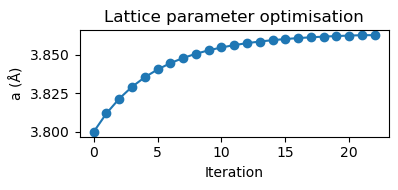

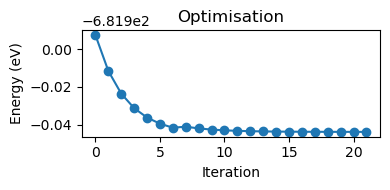

Final unit cell
	 [3.8628244, 0.0, 0.0]
	 [0.0, 3.8628244, 0.0]
	 [0.0, 0.0, 5.4766712]
Final a = 3.8628 b = 3.8628 c = 5.4767 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-400.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-400.cell

You know my heart keeps tellin' me,
You're not a kid at thirty-three,
You play around you lose your wife,
You play too long, you lose your life.
Some gotta win, some gotta lose,
Goodtime Charlie's got the blues.


                                         FILE: silicon-400.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-400.castep   

No warnings found in: silicon-400.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-400.castep


,Parameter,Value
0,plane wave basis set cut-off,400.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


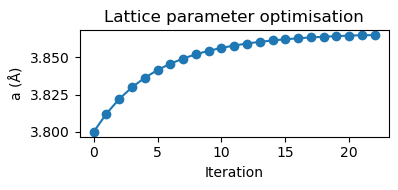

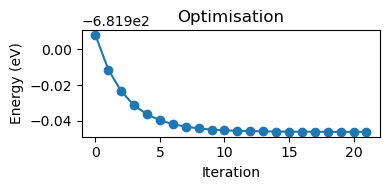

Final unit cell
	 [3.8646864, 0.0, 0.0]
	 [0.0, 3.8646864, 0.0]
	 [0.0, 0.0, 5.4734727]
Final a = 3.8647 b = 3.8647 c = 5.4735 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-500.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-500.cell

The covers of this book are too far apart.
		-- Book review by Ambrose Bierce.


                                         FILE: silicon-500.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-500.castep   

No warnings found in: silicon-500.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-500.castep


,Parameter,Value
0,plane wave basis set cut-off,500.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


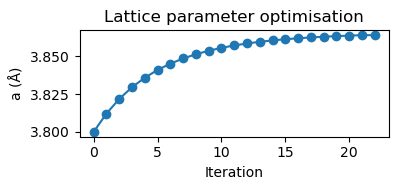

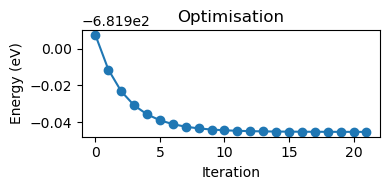

Final unit cell
	 [3.8641337, -0.0, 0.0]
	 [-0.0, 3.8641337, 0.0]
	 [0.0, 0.0, 5.4715921]
Final a = 3.8641 b = 3.8641 c = 5.4716 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-600.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-600.cell

Marriage causes dating problems.


                                         FILE: silicon-600.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-600.castep   

No warnings found in: silicon-600.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-600.castep


,Parameter,Value
0,plane wave basis set cut-off,600.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


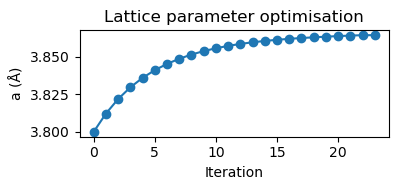

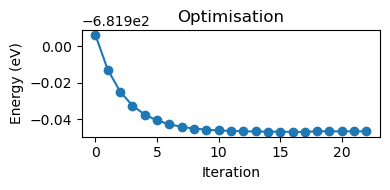

Final unit cell
	 [3.8641514, 0.0, -0.0]
	 [0.0, 3.8641514, 0.0]
	 [-0.0, 0.0, 5.4736606]
Final a = 3.8642 b = 3.8642 c = 5.4737 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-700.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-700.cell

%DCL-MEM-BAD, bad memory
VMS-F-PDGERS, pudding between the ears


                                         FILE: silicon-700.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-700.castep   

No warnings found in: silicon-700.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-700.castep


,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


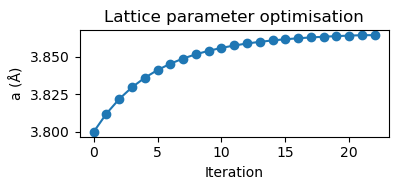

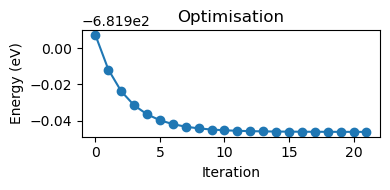

Final unit cell
	 [3.864279, -0.0, 0.0]
	 [-0.0, 3.864279, 0.0]
	 [0.0, 0.0, 5.4725969]
Final a = 3.8643 b = 3.8643 c = 5.4726 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-800.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-800.cell

Finality is death.
Perfection is finality.
Nothing is perfect.
There are lumps in it.


                                         FILE: silicon-800.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-800.castep   

No warnings found in: silicon-800.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-800.castep


,Parameter,Value
0,plane wave basis set cut-off,800.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


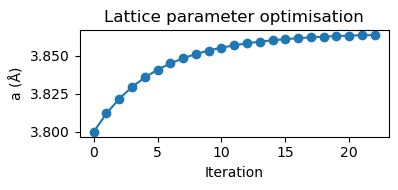

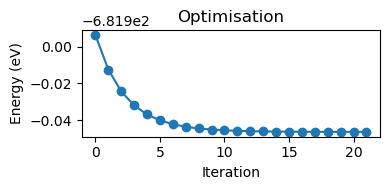

Final unit cell
	 [3.8634566, 0.0, 0.0]
	 [0.0, 3.8634566, 0.0]
	 [0.0, 0.0, 5.47337]
Final a = 3.8635 b = 3.8635 c = 5.4734 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-900.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-900.cell

"Problem solving under linux has never been the circus that it is under
AIX."
(By Pete Ehlke in comp.unix.aix)


                                         FILE: silicon-900.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-900.castep   

No warnings found in: silicon-900.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-900.castep


,Parameter,Value
0,plane wave basis set cut-off,900.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


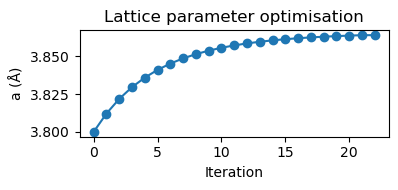

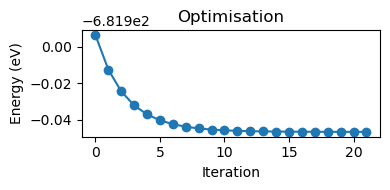

Final unit cell
	 [3.8639405, 0.0, -0.0]
	 [0.0, 3.8639405, -0.0]
	 [-0.0, -0.0, 5.472957]
Final a = 3.8639 b = 3.8639 c = 5.4730 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-1000.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-1000.cell

The trouble with a lot of self-made men is that they worship their creator.


                                        FILE: silicon-1000.castep                                         
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-1000.castep   

No warnings found in: silicon-1000.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-1000.castep


,Parameter,Value
0,plane wave basis set cut-off,1000.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


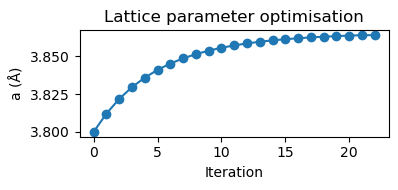

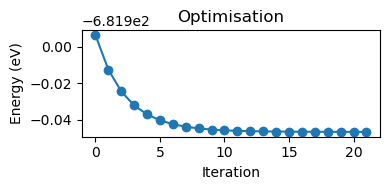

Final unit cell
	 [3.8639622, 0.0, -0.0]
	 [0.0, 3.8639622, 0.0]
	 [-0.0, 0.0, 5.4728708]
Final a = 3.8640 b = 3.8640 c = 5.4729 alpha = 90.0000 beta = 90.0000 gamma = 90.0000



In [7]:
var_list = [200,300,400,500,600,700,800,900,1000]
alist = []
energy_list = []

for var in var_list:
    params['cut_off_energy'] = var
    filename = f"silicon-{var}"
    _ = ct.write_param_file(
        params,
        title = title,
        filename=filename,
        path=job_path,
        display_file=False
        )
    _ = ct.write_cell_file(
        title = title,
        path=job_path,
        filename=filename,
        na=na,
        nb=nb,
        nc=nc,
        lattice_cart=lattice_cart,
        positions_frac=positions_frac,
        constraints=constraints,
        fix_all_ions=True,
        symmetry_generate=symmetry_generate,
        symmetry_tol = symmetry_tol,
        kpoints_mp_grid=kpoints_mp_grid,
        display_file=False
    )

    !zsh -l -c "castepmpi {filename}"

    castep_path = job_path / f"{filename}.castep"

    warnings = ct.get_warnings(castep_path, verbose=True)

    calculation_parameters = ct.get_calculation_parameters(castep_path)
    calculation_parameters_df = pd.DataFrame(list(calculation_parameters.items()), columns=['Parameter', 'Value'])

    lattice_optimisation = ct.get_lattice_parameters(castep_path)
    a_values = [blk['a'] for blk in lattice_optimisation]

    unit_cell, a, b, c, alpha, beta, gamma = ct.get_final_lattice_parameters(castep_path)

    energy_optimisation = ct.get_LBFGS_energies(castep_path)
    energies = [val for _, val in energy_optimisation]

    ct.print_filename(castep_path)
    print(warnings)
    display(calculation_parameters_df)

    ct.plot_sequence(a_values, xlabel='Iteration', ylabel='a (Å)', title='Lattice parameter optimisation')
    ct.plot_sequence(energies, xlabel='Iteration', ylabel='Energy (eV)', title='Optimisation')

    print(f"Final unit cell")
    for vector in unit_cell:
        print(f"\t {vector}")
    print(f"Final a = {a:.4f} b = {b:.4f} c = {c:.4f} alpha = {alpha:.4f} beta = {beta:.4f} gamma = {gamma:.4f}\n")

    alist.append(a)
    energy_list.append(energies[-1])


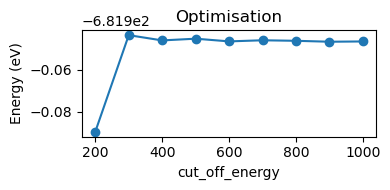

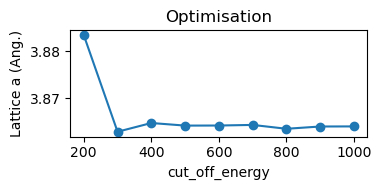

,Cut off energy (eV),Lattice constant (Å),Energy
0,200,3.883392,-681.989382
1,300,3.862824,-681.943675
2,400,3.864686,-681.946160
3,500,3.864134,-681.945343
4,600,3.864151,-681.946622
5,700,3.864279,-681.946094
6,800,3.863457,-681.946346
7,900,3.863941,-681.946780
8,1000,3.863962,-681.946650


In [8]:

ct.plot_sequence(energy_list, var_list, xlabel='cut_off_energy', ylabel='Energy (eV)', title='Optimisation')
ct.plot_sequence(alist, var_list, xlabel='cut_off_energy', ylabel='Lattice a (Ang.)', title='Optimisation')

import pandas as pd

df = pd.DataFrame({
    "Cut off energy (eV)": var_list,
    "Lattice constant (Å)": alist,
    "Energy": energy_list,
})

display( df)

### Convergence with nextrabands

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-0.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-0.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-0.castep

There are a lot of lies going around.... and half of them are true.
		-- Winston Churchill


                                        FILE: silicon-nextra-0.castep                                         
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-0.castep   


===== WARNINGS in: silicon-nextra-0.castep =====
      full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-0.castep

 Warning in parameters_read: it appears you may not have specified enough 
                           - extra bands so you may have trouble with metals
               

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,8.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


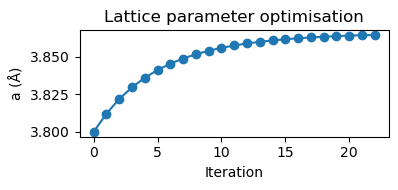

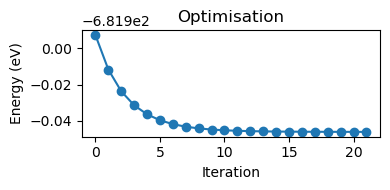

Final unit cell
	 [3.8642767, -0.0, 0.0]
	 [-0.0, 3.8642767, 0.0]
	 [0.0, 0.0, 5.4725926]
Final a = 3.8643 b = 3.8643 c = 5.4726 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-2.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-2.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-2.castep

I never said all Democrats were saloonkeepers; what I said was all
saloonkeepers were Democrats.


                                        FILE: silicon-nextra-2.castep                                         
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-2.castep   


===== WARNINGS in: silicon-nextra-2.castep =====
      full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-n

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,10.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


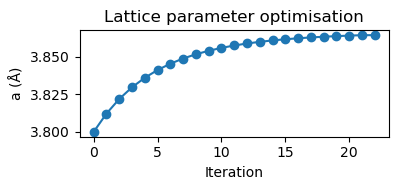

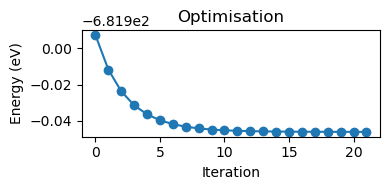

Final unit cell
	 [3.8642747, 0.0, 0.0]
	 [0.0, 3.8642747, -0.0]
	 [0.0, 0.0, 5.4725969]
Final a = 3.8643 b = 3.8643 c = 5.4726 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-4.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-4.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-4.castep

Each new user of a new system uncovers a new class of bugs.
		-- Kernighan


                                        FILE: silicon-nextra-4.castep                                         
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-4.castep   


===== WARNINGS in: silicon-nextra-4.castep =====
      full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-4.castep

       

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,12.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


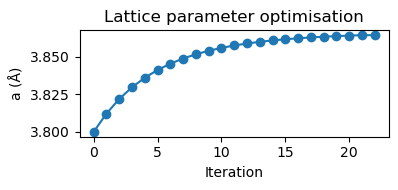

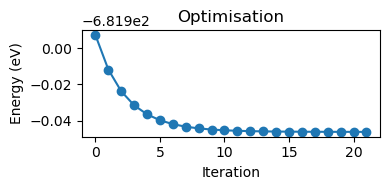

Final unit cell
	 [3.8642777, 0.0, 0.0]
	 [0.0, 3.8642777, -0.0]
	 [0.0, -0.0, 5.4725957]
Final a = 3.8643 b = 3.8643 c = 5.4726 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-6.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-6.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-6.castep

FORTUNE DISCUSSES THE DIFFERENCES BETWEEN MEN AND WOMEN:	#5

Trust:
	The average woman would really like to be told if her mate is fooling
around behind her back.  This same woman wouldn't tell her best friend if
she knew the best friends' mate was having an affair.  She'll tell all her
OTHER friends, however.  The average man won't say anything if he knows that
one of his friend's mates is fooling around, and he'd rather not know if
his mate is having an affair either

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


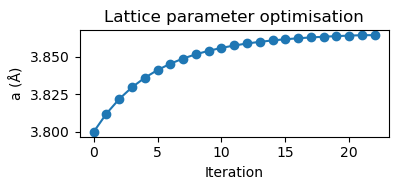

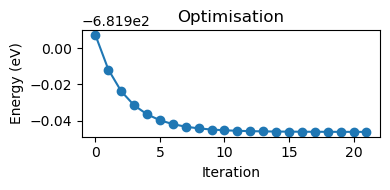

Final unit cell
	 [3.864279, -0.0, -0.0]
	 [-0.0, 3.864279, 0.0]
	 [-0.0, 0.0, 5.4725969]
Final a = 3.8643 b = 3.8643 c = 5.4726 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-8.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-8.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-8.castep

He who steps on others to reach the top has good balance.


                                        FILE: silicon-nextra-8.castep                                         
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-8.castep   

No warnings found in: silicon-nextra-8.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-8.castep


,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,16.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


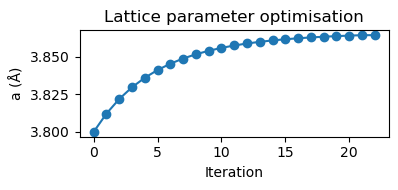

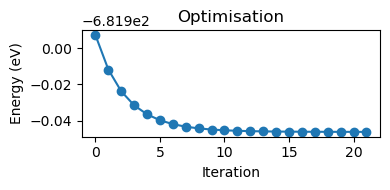

Final unit cell
	 [3.8642802, -0.0, 0.0]
	 [-0.0, 3.8642802, -0.0]
	 [0.0, -0.0, 5.4725973]
Final a = 3.8643 b = 3.8643 c = 5.4726 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-10.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-10.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-10.castep

Here there be tygers.



In [ ]:
var_list = [0,2,4,6,8,10,12,14]
alist = []
energy_list = []
params['cut_off_energy'] = 700

for var in var_list:
    params['nextra_bands'] = var
    filename = f"silicon-nextra-{var}"
    _ = ct.write_param_file(
        params,
        title = title,
        filename=filename,
        path=job_path,
        display_file=False
        )
    _ = ct.write_cell_file(
        title = title,
        path=job_path,
        filename=filename,
        na=na,
        nb=nb,
        nc=nc,
        lattice_cart=lattice_cart,
        positions_frac=positions_frac,
        constraints=constraints,
        fix_all_ions=True,
        symmetry_generate=symmetry_generate,
        symmetry_tol = symmetry_tol,
        kpoints_mp_grid=kpoints_mp_grid,
        display_file=False
    )

    castep_file = job_path / f"{filename}.castep"
    print(f"castep_file = {castep_file}")

    !zsh -l -c "castepmpi {filename}"

    castep_path = job_path / f"{filename}.castep"

    warnings = ct.get_warnings(castep_path, verbose=True)

    calculation_parameters = ct.get_calculation_parameters(castep_path)
    calculation_parameters_df = pd.DataFrame(list(calculation_parameters.items()), columns=['Parameter', 'Value'])

    lattice_optimisation = ct.get_lattice_parameters(castep_path)
    a_values = [blk['a'] for blk in lattice_optimisation]

    unit_cell, a, b, c, alpha, beta, gamma = ct.get_final_lattice_parameters(castep_path)

    energy_optimisation = ct.get_LBFGS_energies(castep_path)
    energies = [val for _, val in energy_optimisation]

    ct.print_filename(castep_path)
    print(warnings)
    display(calculation_parameters_df)

    ct.plot_sequence(a_values, xlabel='Iteration', ylabel='a (Å)', title='Lattice parameter optimisation')
    ct.plot_sequence(energies, xlabel='Iteration', ylabel='Energy (eV)', title='Optimisation')

    print(f"Final unit cell")
    for vector in unit_cell:
        print(f"\t {vector}")
    print(f"Final a = {a:.4f} b = {b:.4f} c = {c:.4f} alpha = {alpha:.4f} beta = {beta:.4f} gamma = {gamma:.4f}\n")

    alist.append(a)
    energy_list.append(energies[-1])


In [ ]:
ct.plot_sequence(energy_list, var_list, xlabel='nextrabands', ylabel='Energy (eV)', title='Optimisation')
ct.plot_sequence(alist, var_list, xlabel='nextrabands', ylabel='Lattice a (Ang.)', title='Optimisation')

import pandas as pd

df = pd.DataFrame({
    "nextrabands": var_list,
    "Lattice constant (Å)": alist,
    "Energy": energy_list,
})

display( df)